In [16]:
from environments.takeaway import utils as twy
from environments.takeaway.co_aa_takeaway import COAATakeaway
from argumentation.utils import construct_all_attacks
from argumentation.classes import ArgumentationFramework
from agents.co_aa_agent import COAAAgent
from utils import run_episode

import subprocess
import socket
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from tqdm.notebook import tqdm

In [17]:
def get_host(mode: str = 'recv'):
    batcmd="wsl hostname -I"
    result = subprocess.check_output(batcmd, shell=True)
    if mode == 'send':
        return result.decode("utf-8").strip()
    return socket.gethostbyname(socket.gethostname())

In [18]:
arg_actions = twy.arg_actions
args = args_naive = list(arg_actions.keys())
# atts = construct_all_attacks(arg_actions)
# af = ArgumentationFramework(args, atts)

In [19]:
rewards = []

epsilon = 0.01
gamma = 0.99
alpha = 5e-2
agent = COAAAgent(alpha, gamma, epsilon, args)
ordering_path = r"\\wsl$\Ubuntu-16.04\home\candido\robocup\ORLA\ordering.txt"
send_host = get_host('send')
send_port = 7000
recv_host = get_host('recv')
recv_port = 7001

env = COAATakeaway(
    args,   
    send_host,
    send_port,
    recv_host,
    recv_port,
    ordering_path
)

t_episodes = tqdm(range(1, int(1e4)+1))
for episode in t_episodes:
    start_state = env.reset()
    end_state, reward, animation_data = run_episode(env, agent, start_state, is_learning=True, is_animating=False, is_rendering=False)
    rewards.append(reward)
    t_episodes.set_postfix({'avg': np.average(rewards[-100:]), 'last': rewards[-1]})



  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

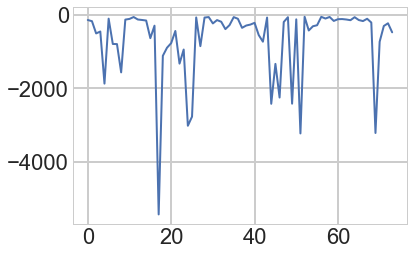

In [20]:
plt.plot(rewards)

In [13]:
sns.set(rc = {'figure.figsize':(15,8)}, style='whitegrid')
sns.set_context("poster", rc={"lines.linewidth": 2}, font_scale=1)

df = pd.DataFrame(rewards, columns=('reward'))
df['reward_avg'] = df.transform(lambda x: x.rolling(1).mean())
  
rewards_plot = sns.lineplot(x='episode', y='reward_avg', data=df, color="b")
rewards_plot.set(ylim=(0, 1))
rewards_plot.set(ylabel="Reward")

right_y = rewards_b_plot.axes.twinx()
sns.lineplot(x='episode', y='acc_avg', data=eval_b, color="g", ax=right_y, ci='sd')
plt.legend(loc='lower right', handles=[Line2D([], [], marker='_', color="b", label='Reward'), Line2D([], [], marker='_', color="g", label='Success ratio %')], facecolor='white')
right_y.set(ylim=(lim*100 for lim in rewards_b_plot.get_ylim()))
right_y.set(ylabel="Success ratio %")

rewards_b_plot.set(xlabel="Episode")
# rewards_b_plot.set(xlim=(0, 1e6))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


TypeError: Index(...) must be called with a collection of some kind, 'reward' was passed